### Joslin

* [Dataset]

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/joslin/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [ ]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'ID'], inplace=True)
# df.DR_3 = df.DR_3.astype(str) ## Do not convert it here. This will be done in line 186/203 in classifiers.py
df.head()

## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] 
image_columns = [column for column in df.columns if 'image' in column] 
label_columns = 'DR_3'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (18815, 1030)
Test Shape: (4705, 1030)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 131843


STAGE:2024-03-19 14:53:05 2783902:2783902 ActivityProfilerController.cpp:311] Completed Stage: Warm Up


Epoch 1/50 - Test Accuracy: 0.6261, macro-f1: 0.4969
Epoch 1/50 - Training Time: 18.72 seconds | Inference Time: 4.39 seconds
Epoch 2/50 - Test Accuracy: 0.7001, macro-f1: 0.5233
Epoch 2/50 - Training Time: 12.86 seconds | Inference Time: 4.44 seconds
Epoch 3/50 - Test Accuracy: 0.6663, macro-f1: 0.5068
Epoch 3/50 - Training Time: 12.55 seconds | Inference Time: 4.25 seconds
Epoch 4/50 - Test Accuracy: 0.6963, macro-f1: 0.5321
Epoch 4/50 - Training Time: 12.88 seconds | Inference Time: 4.83 seconds
Epoch 5/50 - Test Accuracy: 0.6857, macro-f1: 0.5250
Epoch 5/50 - Training Time: 13.36 seconds | Inference Time: 4.61 seconds
Epoch 6/50 - Test Accuracy: 0.6863, macro-f1: 0.5266
Epoch 6/50 - Training Time: 12.20 seconds | Inference Time: 4.59 seconds
Epoch 8/50 - Test Accuracy: 0.6969, macro-f1: 0.5343
Epoch 8/50 - Training Time: 13.02 seconds | Inference Time: 4.17 seconds
Epoch 9/50 - Test Accuracy: 0.6482, macro-f1: 0.5100
Epoch 9/50 - Training Time: 12.34 seconds | Inference Time: 4.47 

STAGE:2024-03-19 15:09:36 2783902:2783902 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2024-03-19 15:09:49 2783902:2783902 ActivityProfilerController.cpp:321] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                   DataParallel.forward        70.16%      576.822s        73.51%      604.360s      32.846ms           0 b           0 b      11.33 Gb      -1.84 Gb         18400  
                                         training_batch         4.11%       33.806s        64.93%      533.812s      36.314ms          24 b           0 b      -4.52 Gb     -10.12 Gb         14700  
enumerate

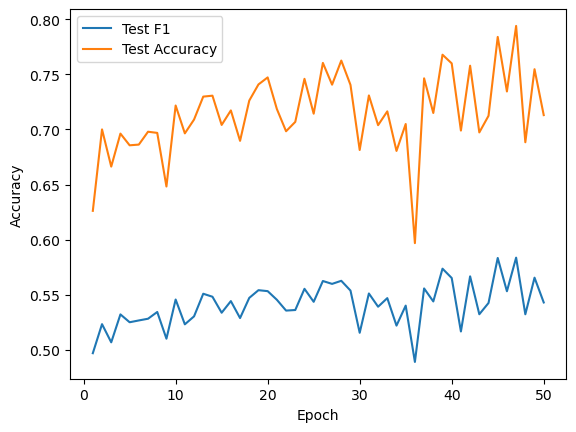

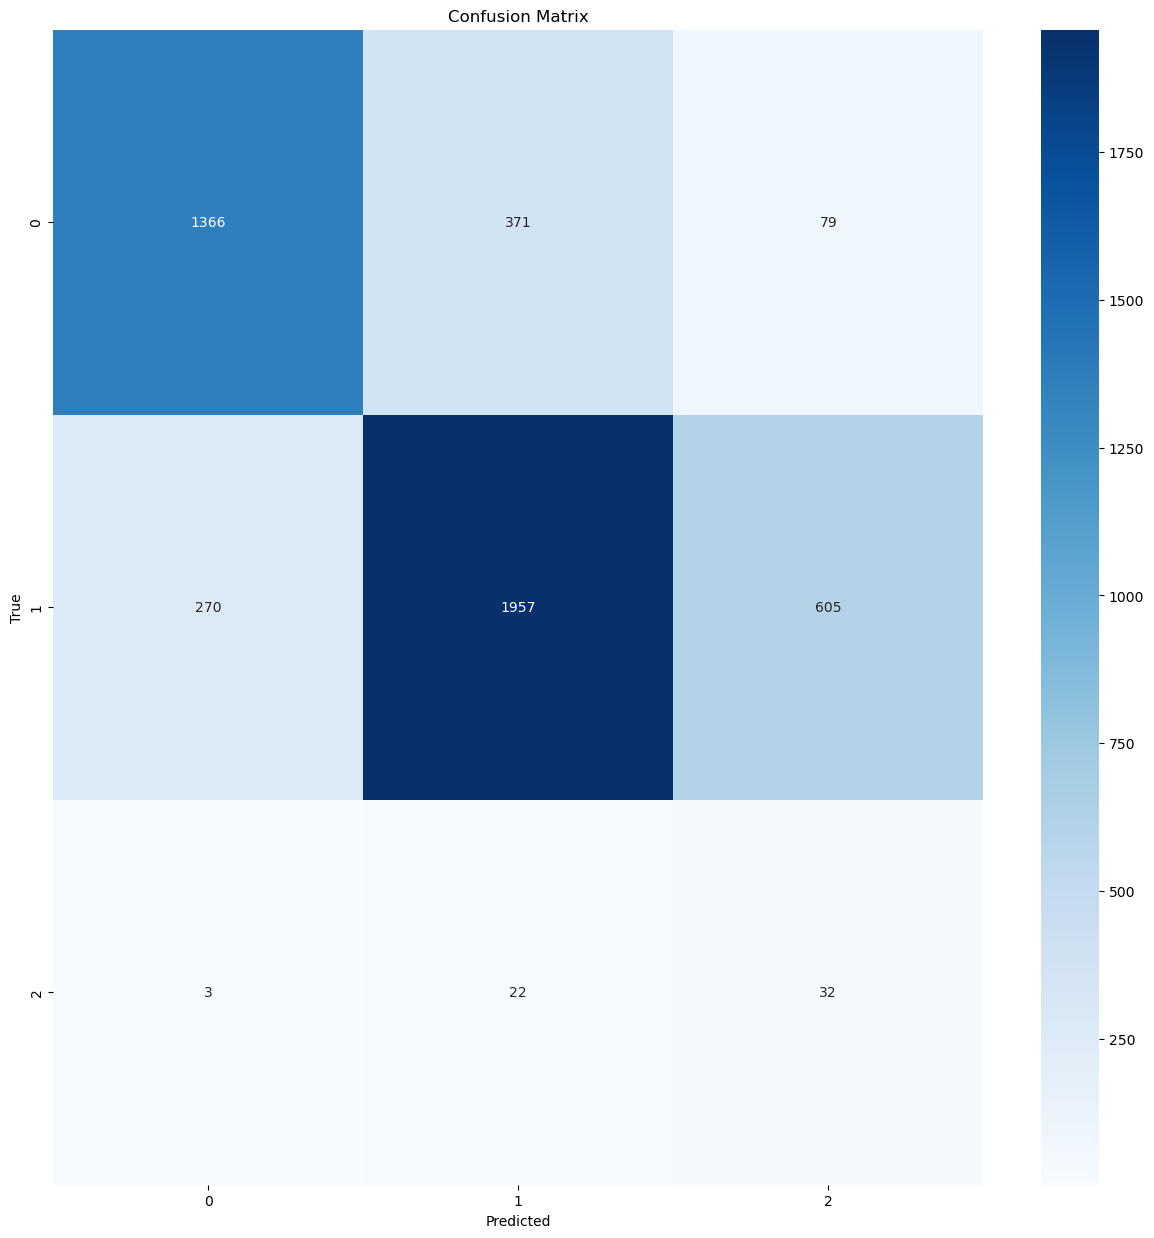

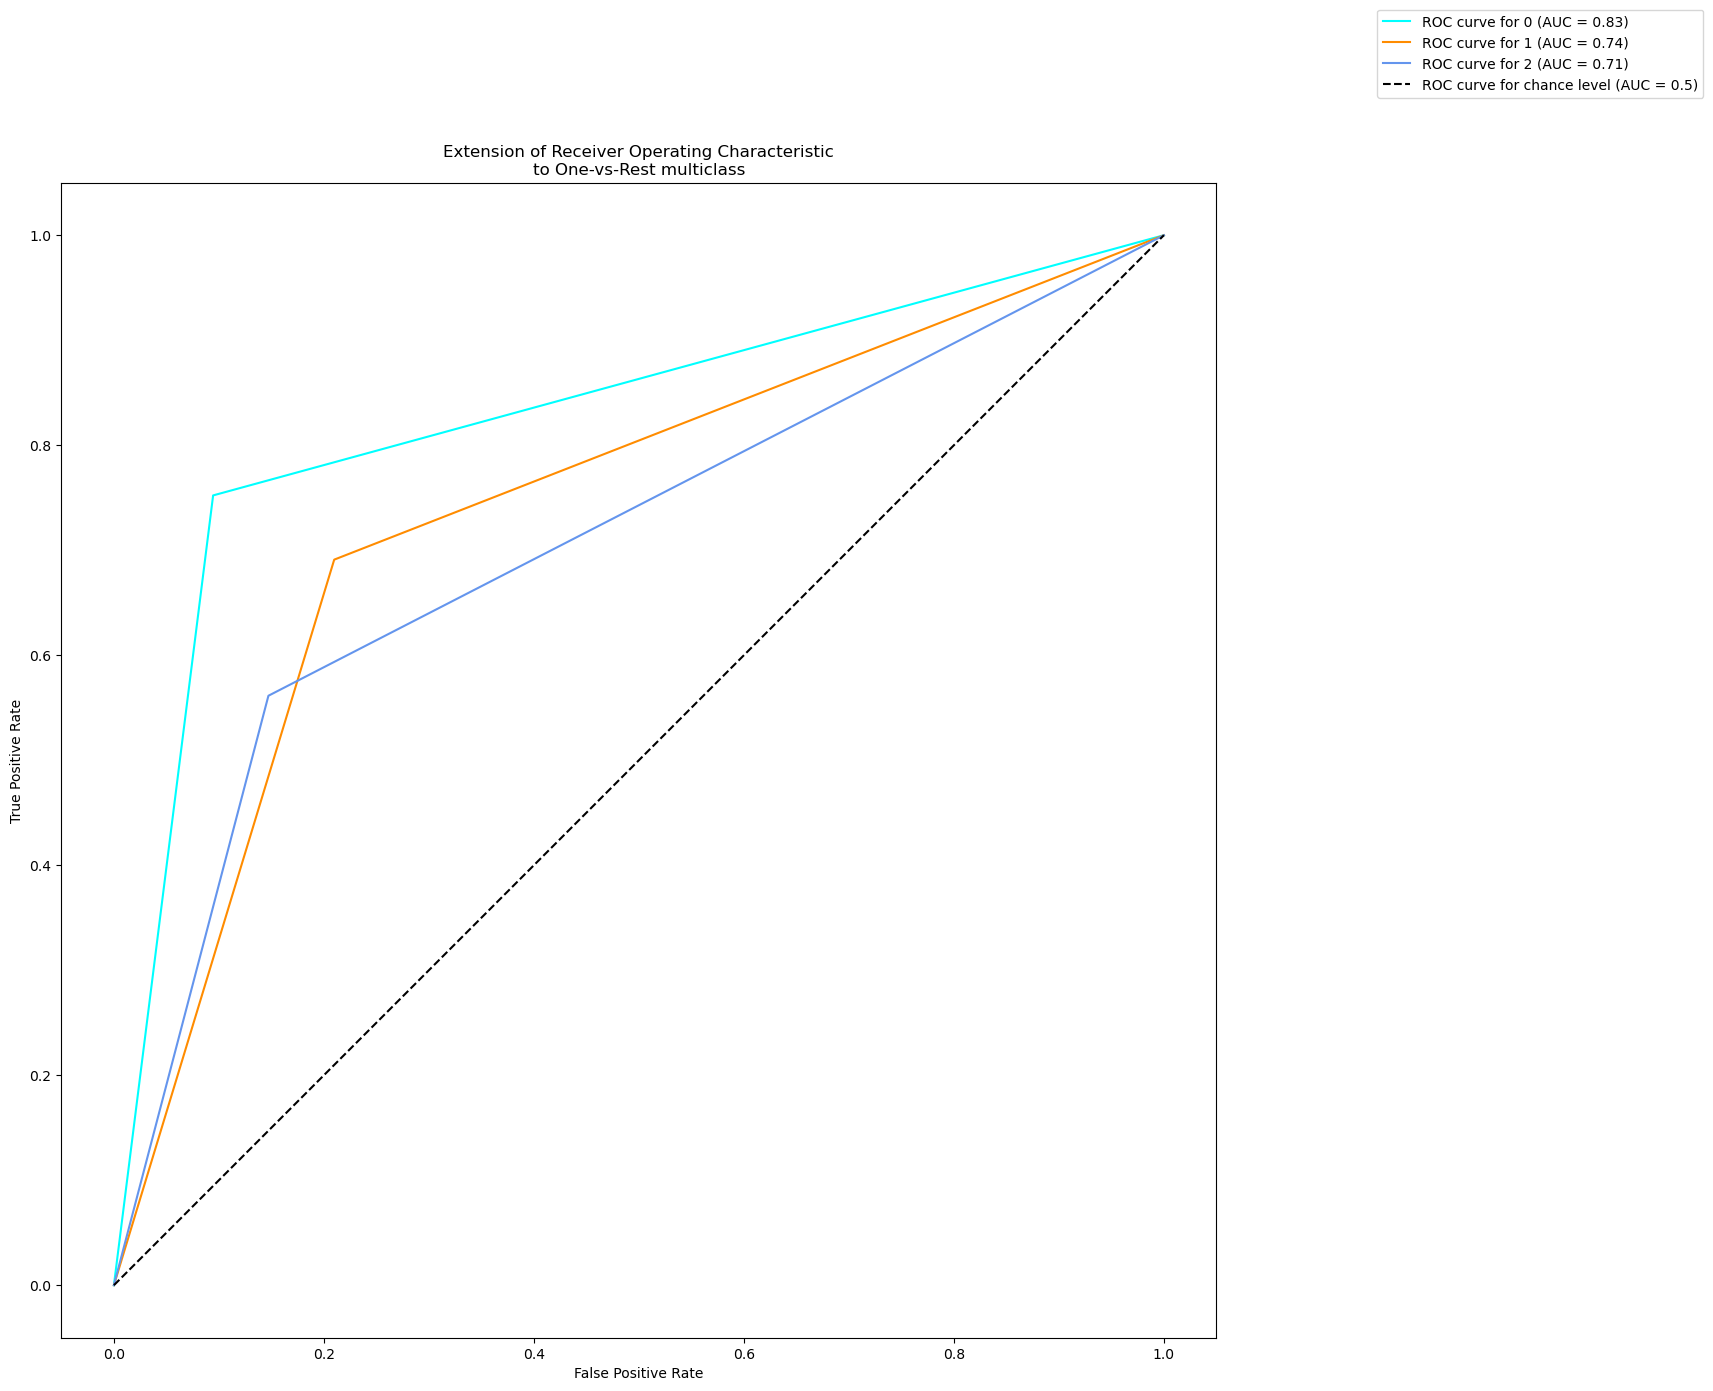

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1816
           1       0.83      0.69      0.76      2832
           2       0.04      0.56      0.08        57

    accuracy                           0.71      4705
   macro avg       0.57      0.67      0.54      4705
weighted avg       0.82      0.71      0.76      4705



In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
device = "cuda"
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True, device=device)

Training Late Fusion Model:
Model Memory Usage: 0.25 MB
The number of parameters of the model are: 66307


STAGE:2024-03-19 15:47:15 2783902:2783902 ActivityProfilerController.cpp:311] Completed Stage: Warm Up


Epoch 1/50 - Test Accuracy: 0.6714, macro-f1: 0.5136
Epoch 1/50 - Training Time: 23.91 seconds | Inference Time: 14.20 seconds
Epoch 2/50 - Test Accuracy: 0.6570, macro-f1: 0.5021
Epoch 2/50 - Training Time: 21.50 seconds | Inference Time: 11.46 seconds
Epoch 3/50 - Test Accuracy: 0.6493, macro-f1: 0.5098
Epoch 3/50 - Training Time: 23.59 seconds | Inference Time: 15.66 seconds
Epoch 4/50 - Test Accuracy: 0.6580, macro-f1: 0.5162
Epoch 4/50 - Training Time: 23.80 seconds | Inference Time: 15.44 seconds
Epoch 5/50 - Test Accuracy: 0.7456, macro-f1: 0.5529
Epoch 5/50 - Training Time: 21.88 seconds | Inference Time: 14.18 seconds
Epoch 6/50 - Test Accuracy: 0.7169, macro-f1: 0.5438
Epoch 6/50 - Training Time: 23.99 seconds | Inference Time: 16.07 seconds
Epoch 7/50 - Test Accuracy: 0.6531, macro-f1: 0.5126
Epoch 7/50 - Training Time: 24.22 seconds | Inference Time: 11.66 seconds
Epoch 8/50 - Test Accuracy: 0.7309, macro-f1: 0.5473
Epoch 8/50 - Training Time: 22.41 seconds | Inference Time

STAGE:2024-03-19 16:20:20 2783902:2783902 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2024-03-19 16:20:31 2783902:2783902 ActivityProfilerController.cpp:321] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         3.82%       47.610s        53.47%      666.333s      36.214ms       5.38 Mb    -265.16 Kb    -993.22 Mb      -8.88 Gb         18400  
                                   DataParallel.forward        46.09%      574.308s        47.95%      597.499s      32.473ms           0 b           0 b       6.84 Gb    -964.88 Mb         18400  
enumerate

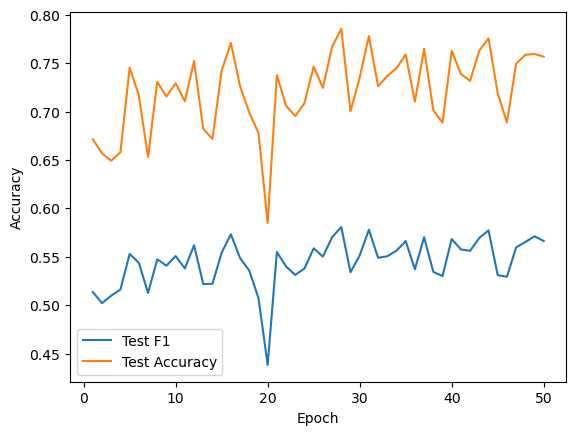

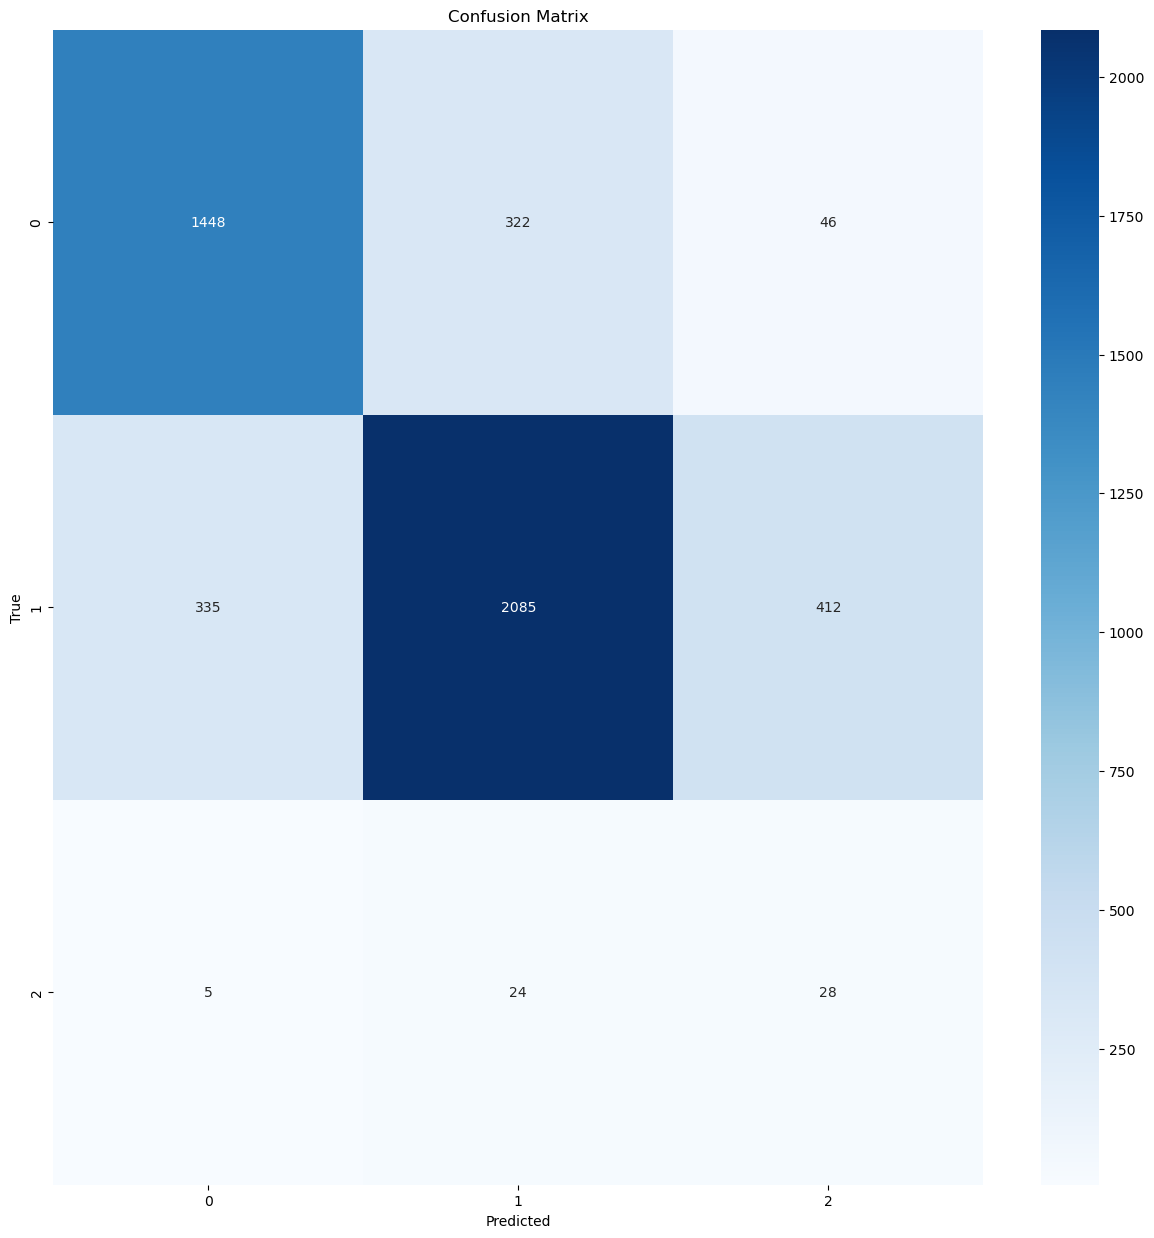

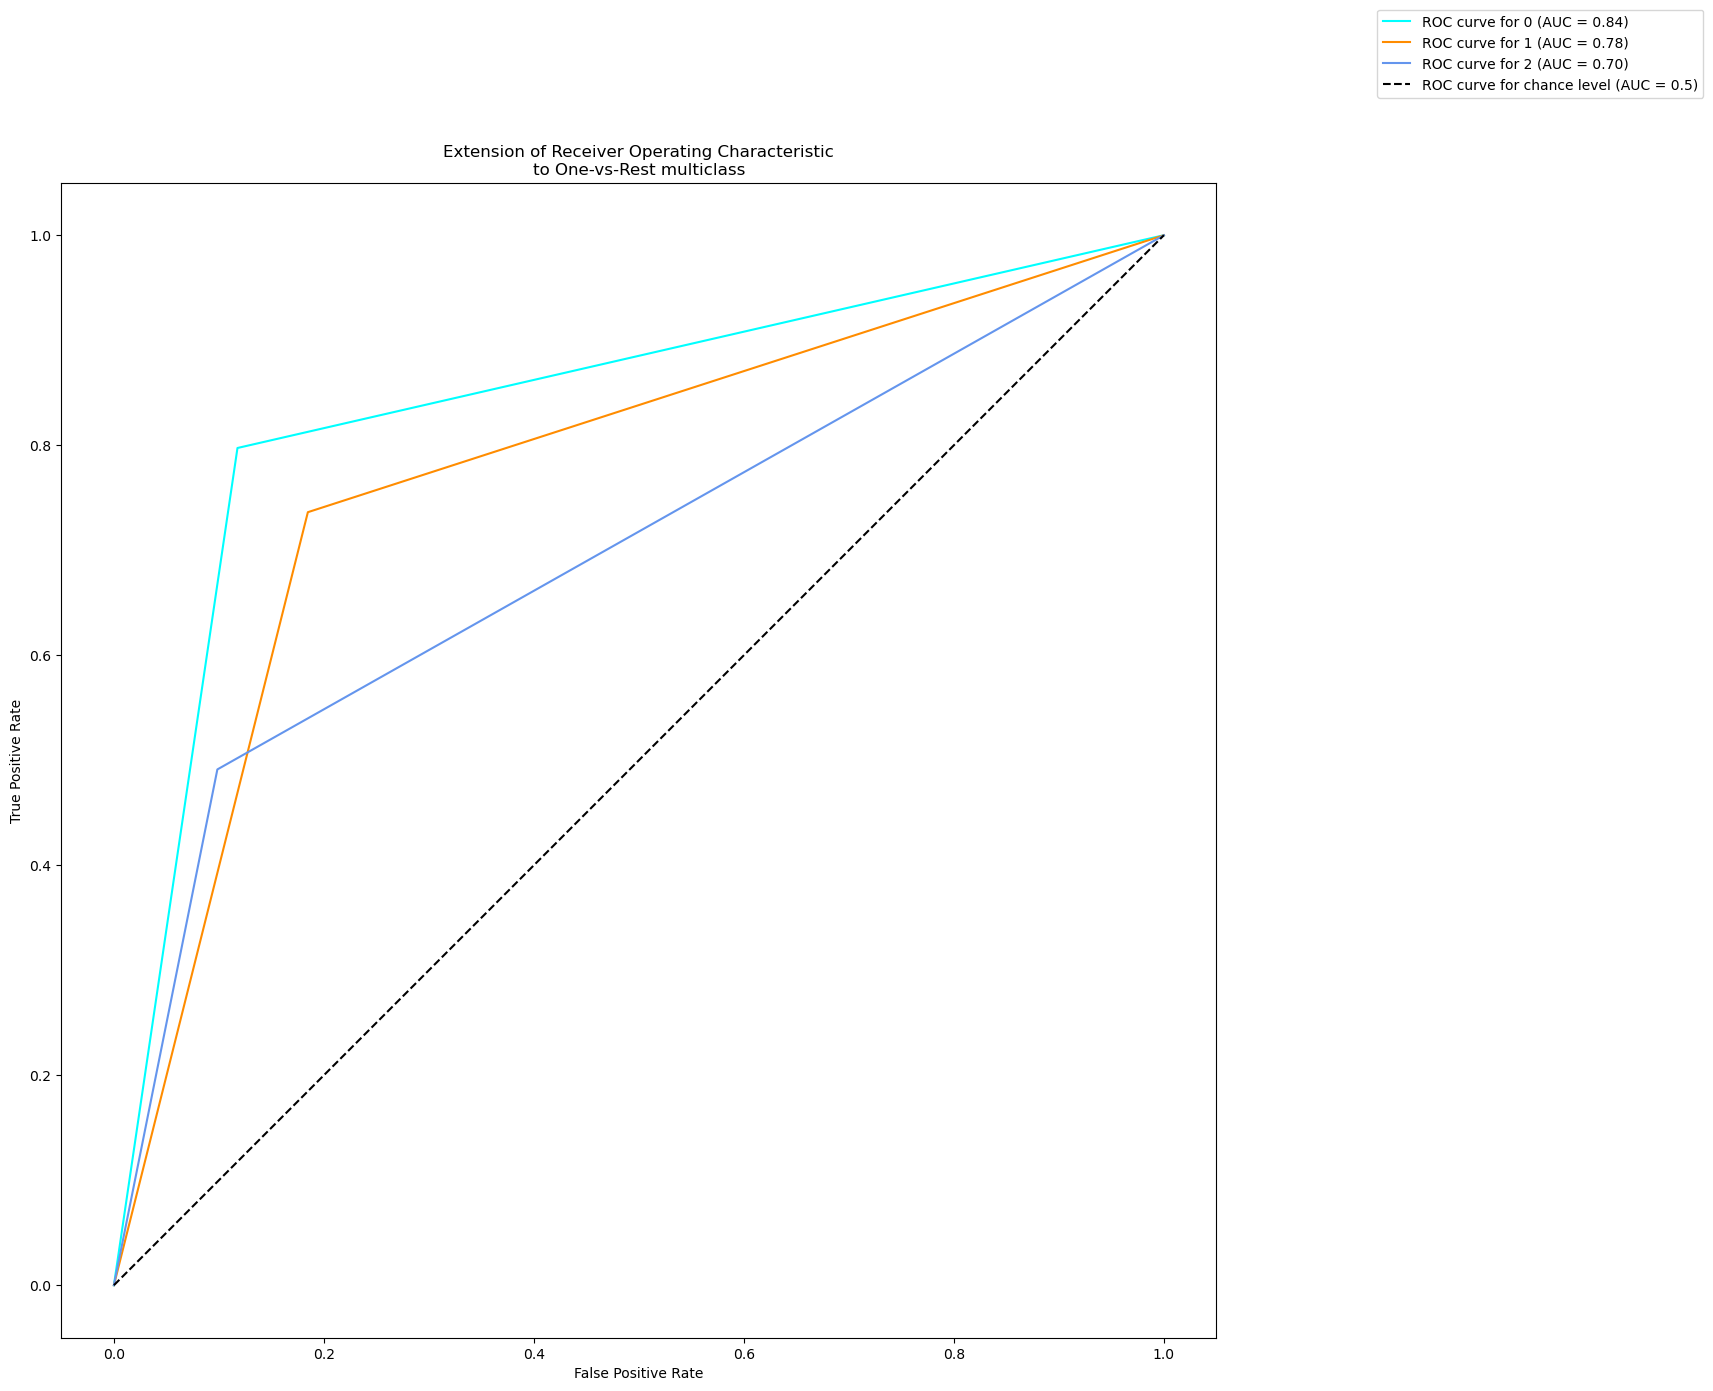

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1816
           1       0.86      0.74      0.79      2832
           2       0.06      0.49      0.10        57

    accuracy                           0.76      4705
   macro avg       0.58      0.67      0.57      4705
weighted avg       0.83      0.76      0.79      4705



In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
device = "cuda"
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True, device=device)